<a href="https://colab.research.google.com/github/Anitha-saladi/FMML_LAB-MODULES/blob/main/FMML_Module4_Lab3_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [47]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

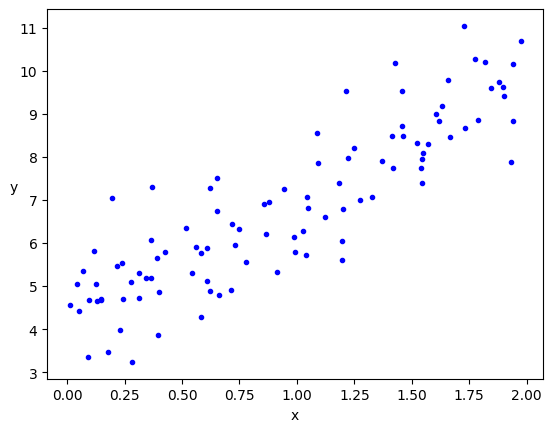

In [48]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [49]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [50]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [51]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

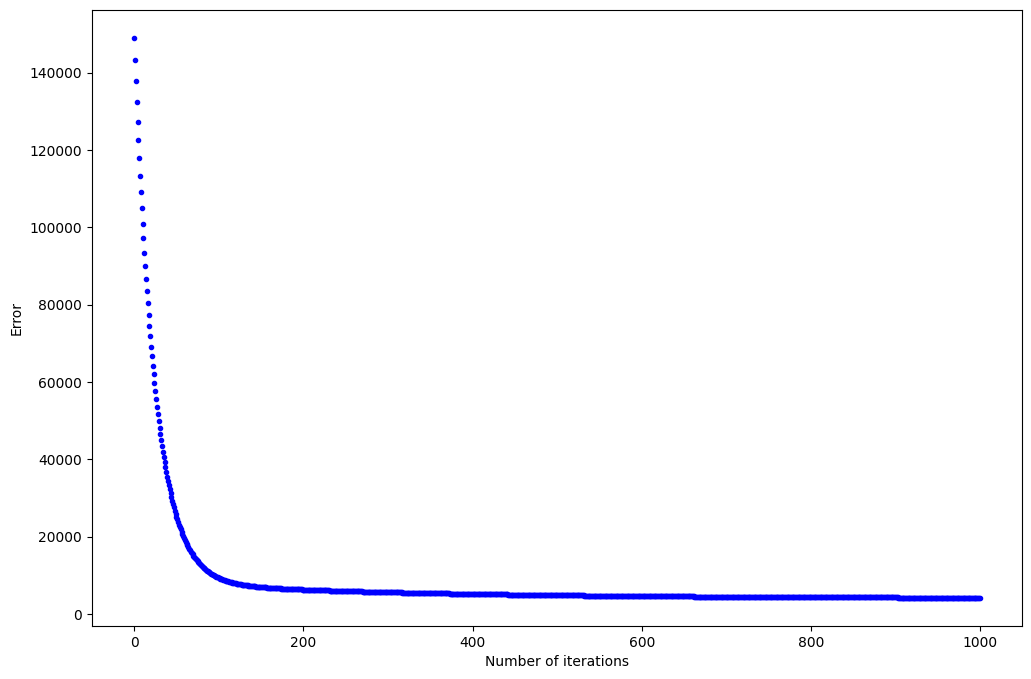

In [52]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

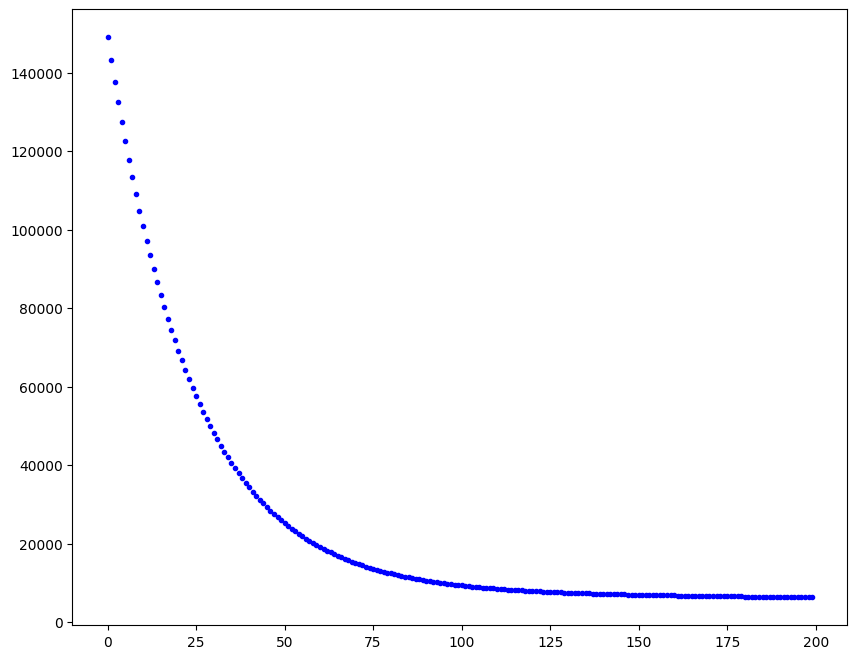

In [53]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [54]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [55]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


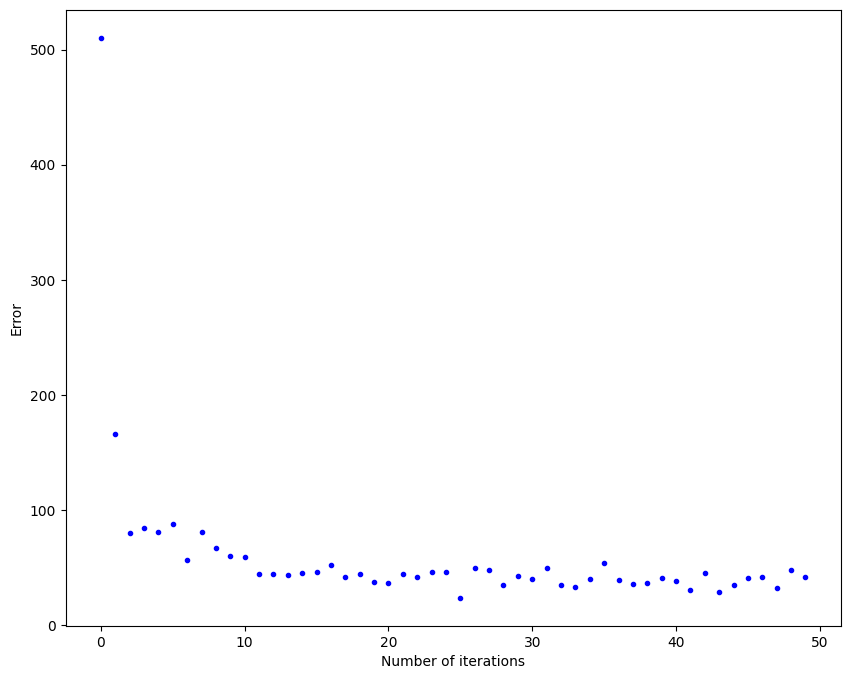

In [56]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [57]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [58]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


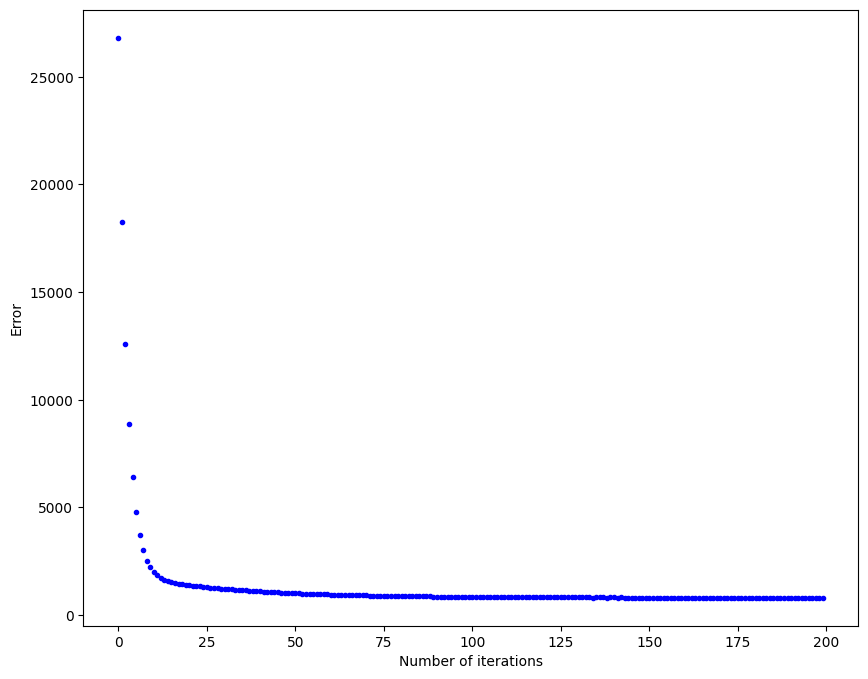

In [59]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

Final y_pred:
 [[4.24809005]
 [2.74098059]]
Final error: 2010.278


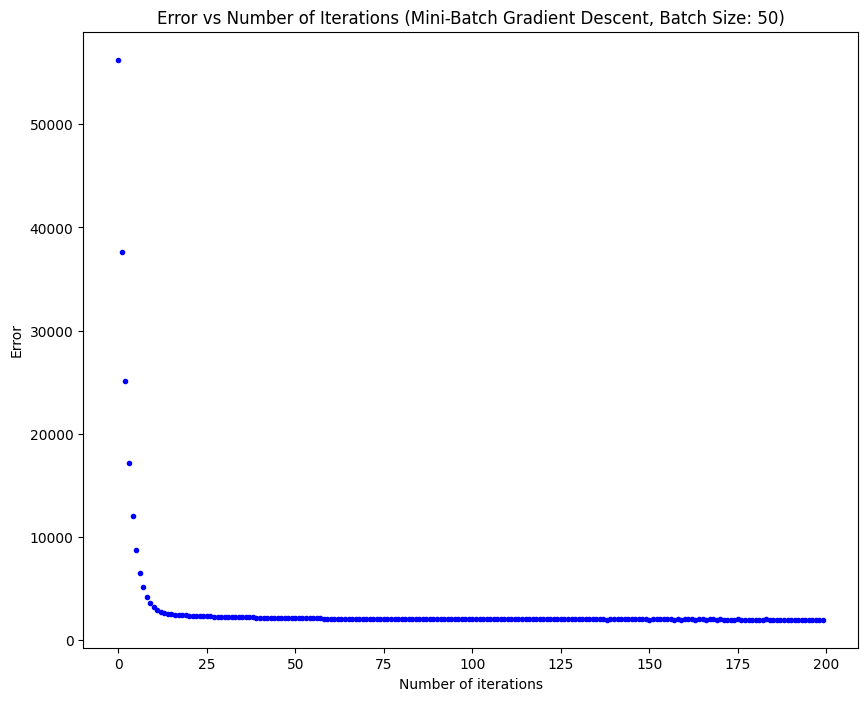

In [60]:

#Answer-1:

import matplotlib.pyplot as plt

# Test the Mini-Batch Gradient Descent function with a different batch size
lr = 0.1
n_iter = 200
batch_size = 50  # Change the batch size here
y_pred = np.random.randn(2, 1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter, batch_size)

# Print results
print('Final y_pred:\n', y_pred)
print('Final error: {:0.3f}'.format(cost_history[-1]))

# Plot the cost history
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(range(n_iter), cost_history, 'b.')
ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
plt.title(f'Error vs Number of Iterations (Mini-Batch Gradient Descent, Batch Size: {batch_size})')
plt.show()

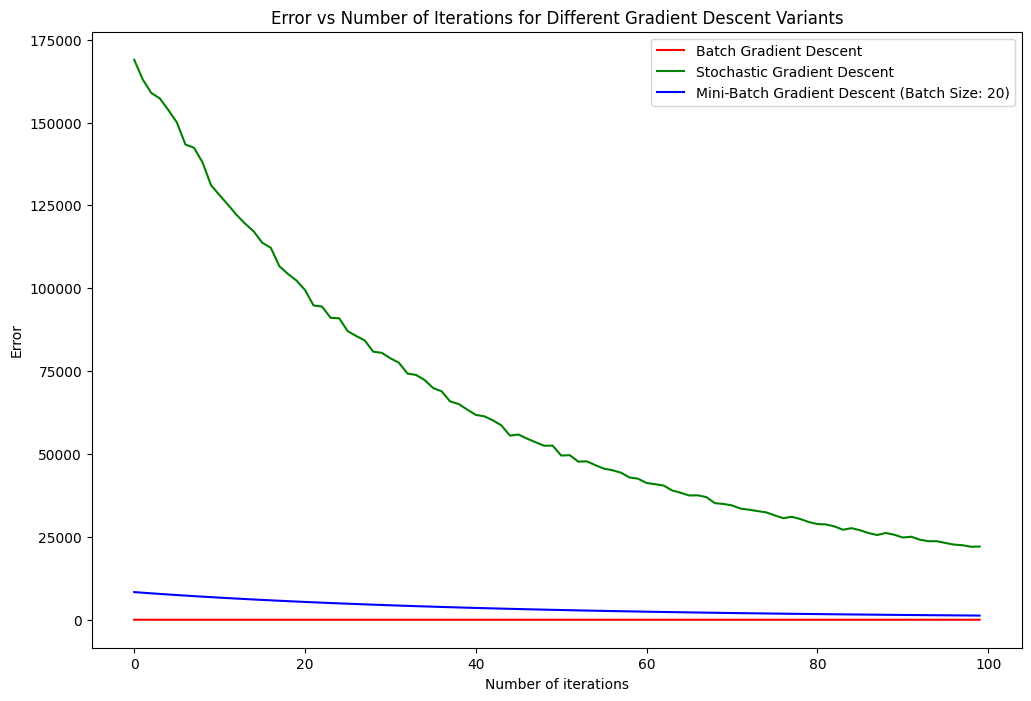

In [63]:

#Answer-2:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target.reshape(-1, 1)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term to X
X_b = np.c_[np.ones((len(X), 1)), X]

# Set parameters for gradient descent
lr = 0.01
n_iter = 100
batch_size = 20

# Initialize y_pred with random values
y_pred_bgd = np.random.randn(X_b.shape[1], 1)
y_pred_sgd = np.random.randn(X_b.shape[1], 1)
y_pred_mbgd = np.random.randn(X_b.shape[1], 1)

# Function to calculate cost
def cal_cost(y_pred, X, y):
    m = len(y)
    predictions = X.dot(y_pred)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# Batch Gradient Descent
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        cost_history[it] = cal_cost(y_pred, X, y)

    return y_pred, cost_history

# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, -1)
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

# Mini-Batch Gradient Descent
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)
    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            prediction = np.dot(X_i, y_pred)
            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

# Perform Batch Gradient Descent
y_pred_bgd, cost_history_bgd = gradient_descent(X_b, y, y_pred_bgd, lr, n_iter)

# Perform Stochastic Gradient Descent (SGD)
y_pred_sgd, cost_history_sgd = stochastic_gradient_descent(X_b, y, y_pred_sgd, lr, n_iter)

# Perform Mini-Batch Gradient Descent (MBGD)
y_pred_mbgd, cost_history_mbgd = minibatch_gradient_descent(X_b, y, y_pred_mbgd, lr, n_iter, batch_size)

# Plot the cost history for all three variants
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(range(n_iter), cost_history_bgd, label='Batch Gradient Descent', color='red')
ax.plot(range(n_iter), cost_history_sgd, label='Stochastic Gradient Descent', color='green')
ax.plot(range(n_iter), cost_history_mbgd, label=f'Mini-Batch Gradient Descent (Batch Size: {batch_size})', color='blue')
ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
ax.legend()
plt.title('Error vs Number of Iterations for Different Gradient Descent Variants')
plt.show()

Changing the learning rate in optimization algorithms like Batch Gradient Descent (BGD), Stochastic Gradient Descent (SGD), and Mini-batch Gradient Descent can have different effects on the convergence and performance of the optimization process.

Batch Gradient Descent (BGD): Effect of Increasing Learning Rate: May lead to overshooting or slow convergence. Sensitivity to learning rate, especially with larger datasets.

Stochastic Gradient Descent (SGD): Effect of Increasing Learning Rate: More robust to larger learning rates than BGD. Can still experience overshooting and oscillations.

Mini-batch Gradient Descent: Effect of Increasing Learning Rate: Less sensitive than BGD but more than SGD. Often converges faster than BGD with an appropriate learning rate.

General Considerations: Learning Rate Tuning: Crucial for all algorithms; often tuned through experimentation. Techniques like learning rate schedules or adaptive methods are common.

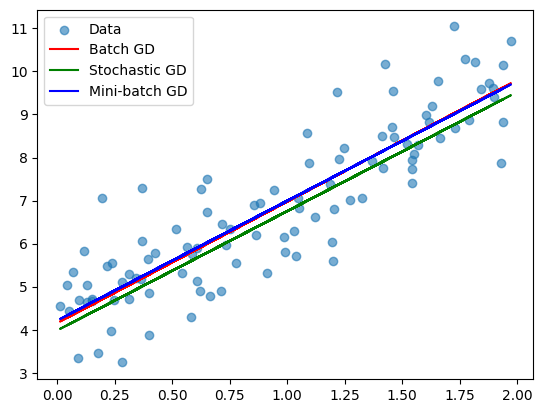

In [64]:
#Answer-3:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Initial parameters
theta_bgd = np.random.randn(2, 1)
theta_sgd = np.random.randn(2, 1)
theta_mbgd = np.random.randn(2, 1)

# Learning rates
learning_rate_bgd = 0.01
learning_rate_sgd = 0.01
learning_rate_mbgd = 0.01

# Number of iterations
n_iterations = 1000

# Batch Gradient Descent
for iteration in range(n_iterations):
    gradients_bgd = 2 / 100 * X_b.T.dot(X_b.dot(theta_bgd) - y)
    theta_bgd = theta_bgd - learning_rate_bgd * gradients_bgd

# Stochastic Gradient Descent
for epoch in range(n_iterations):
    for i in range(100):
        random_index = np.random.randint(100)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients_sgd = 2 * xi.T.dot(xi.dot(theta_sgd) - yi)
        theta_sgd = theta_sgd - learning_rate_sgd * gradients_sgd

# Mini-batch Gradient Descent
batch_size = 20
for epoch in range(n_iterations):
    for i in range(0, 100, batch_size):
        xi = X_b[i:i+batch_size]
        yi = y[i:i+batch_size]
        gradients_mbgd = 2 / batch_size * xi.T.dot(xi.dot(theta_mbgd) - yi)
        theta_mbgd = theta_mbgd - learning_rate_mbgd * gradients_mbgd

# Plot the data and regression lines
plt.scatter(X, y, alpha=0.6, label='Data')
plt.plot(X, X_b.dot(theta_bgd), label='Batch GD', color='red')
plt.plot(X, X_b.dot(theta_sgd), label='Stochastic GD', color='green')
plt.plot(X, X_b.dot(theta_mbgd), label='Mini-batch GD', color='blue')
plt.legend()
plt.show()